#### Commands used in terminal:

/Users/Guaaga/Desktop/muscle3.8.31_i86darwin64 –in seqs.fa –out seqs.aligned.fa
/Users/Guaaga/Desktop/FastTree -nt < seqs.aligned.fa > tree.nwk

I used a different command here because I downloaded muscle and fasttree in my own laptop.

#### Muscle:
The input is a FASTA file and the output is an aligned FASTA file which filled in the gaps making all sequence the same length.

#### Newick
Newick creates a file that creates a tree.

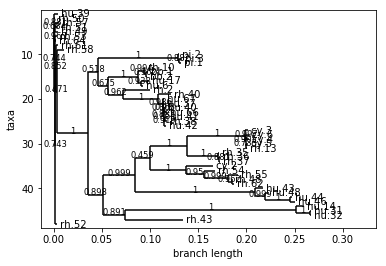

In [2]:
from Bio import Phylo
tree = Phylo.read("tree.nwk", "newick")
Phylo.draw(tree)

##### *Are there any obvious clusters of sequences?*
Yes
##### *Are there any pairs or groups of sequences that seem very closely related?* 
hu.14&hu.31&hu.32, pi.2&pi.3&pi.1, 

rh40&hu.67&hu.37&hu.40&hu.66&hu.42&hu.41&rh.38
hu.43&hu.48&hu.44&hu.46,

rh.35&rh.36&rh.37,

cy.3&cy.6&cy.4&cy.5&rh.13, 
etc.
##### *Any that are any sequences that seem far more distantly related than the others?*
hu.39&rh.13, etc.

In [3]:
from Bio import SeqIO
import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt

input_iter = SeqIO.parse("seqs.aligned.fa", "fasta") # will loop through the file
chosen_specimen = ["hu.39", "rh.58", "pi.2", "hu.17", "rh.40", "hu.14", 
                   "hu.43", "cy.2", "rh.35", "cy.3" ] #one speciment from each obvious cluster

##### What are some of the most common matches for each cluster? 
They have similar score, identities, gaps, and length. They also have same length of sequence. pi.1, pi.2, and pi.3 demonstrate these.

##### Do they all match the same gene? 
Yes.

##### Are there any that definitely do not match the others? 
Yes. Adeno-associated virus vs. non-primate adeno associate

##### Why might we not trust the annotations for sequences that come up in our BLAST?
BLAST is an online tool, and its algorithm is designed to make the program runs in a reasonable amount of time, which has a side-effect that decreases the accuracy of the program.
Also, thereare many similar domains among different specimens such as repeats. The result in BLAST does not help us to identify the differences of some other domains, orientation of the proteins, etc.

In [4]:
result = []
all_seq = []
for record in input_iter:
	if record.id in chosen_specimen:
		temp = record.seq # bind the current sequence to "temp"
		all_seq.append(temp) #add the current sequence (as string) to a big list "all_seq".
seq_len = len(all_seq[0]) # all aligned sequences have the same length
for i in range(seq_len): # loop from the first to the last nt
	temp = ""
	for seq in all_seq:
		temp += seq[i] #turn all the i-th nucleotide of all sequences to string
	result.append(temp)

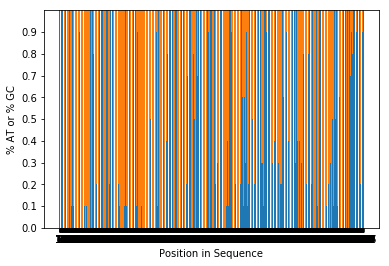

In [3]:
%matplotlib inline

percentAT = [(_.count("A") + _.count("T"))/len(chosen_specimen)for _ in result] # %AT_content of all nt
percentGC = [1 - _ for _ in percentAT]
plt.bar(np.arange(seq_len), percentAT)
plt.bar(np.arange(seq_len), percentGC, bottom=percentAT)
plt.xlabel("Position in Sequence")
plt.ylabel("% AT or % GC")
plt.xticks(np.arange(seq_len)) #add ,(text) if set text labels
plt.yticks(np.arange(1, step=0.1))
plt.show()

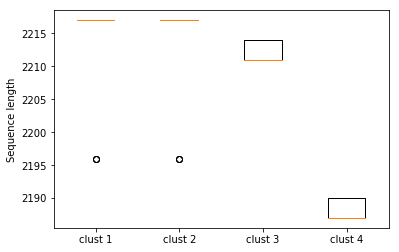

In [5]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
input_iter = SeqIO.parse("seqs.fa", "fasta")
for record in input_iter:
	if record.id in ["hu.39", "rh.50", "rh.49","rh.57", "rh.51", 
					"rh.53", "rh.64", "rh.52", "rh.61", "rh.58"]: #selected speciments from the cluster
		cluster1.append(len(record.seq)) #add the length of each speciment to the cluster
	elif record.id in ["pi.2", "pi.3", "pi.1", "hu.17", "hu.6", 
						"bb.1", "bb.2", "rh.2", "rh.40", "hu.67",
						"hu.37", "hu.40", "hu.66", "hu.42", "hu.41", "rh.38"]:
		cluster2.append(len(record.seq))
	elif record.id in ["rh.43", "hu.14", "hu.31", "hu.32", "hu.43", "hu.48",
						"hu.44", "hu.46", "cy.2", "rh.54", "rh.55", "rh.48", "rh.62"]:
		cluster3.append(len(record.seq))
	elif record.id in ["cy.2", "rh.54", "rh.55", "rh.48", "rh.62", "rh.35", "rh.36", "rh.37",
						"cy.3", "cy.6", "cy.4", "cy.5", "rh.13"]:
		cluster4.append(len(record.seq))
data = [cluster2, cluster2, cluster3, cluster4] #each cluster contains different lengths of sequences of the speciments belong to that cluster 
plt.boxplot(data, labels=["clust 1", "clust 2", "clust 3", "clust 4"], meanline=True)
plt.ylabel('Sequence length')
plt.show()